<!-- WARNING: THIS FILE WAS AUTOGENERATED! DO NOT EDIT! -->

## Binary Classification

In [6]:
import sklearn.datasets
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

from model_inspector import get_inspector

In [7]:
X, y = sklearn.datasets.load_breast_cancer(return_X_y=True, as_frame=True)
X_train, X_test, y_train, y_test = train_test_split(X, y)
inspector = get_inspector(
    RandomForestClassifier().fit(X_train, y_train),
    X_test,
    y_test,
)

In [1]:
#| echo: false
#| output: asis
show_doc(_BinInspector.calculate_metrics_by_thresh)

---

[source](https://github.com/gsganden/model_inspector/tree/main/blob/main/model_inspector/inspect/classifier.py#LNone){target="_blank" style="float:right; font-size:smaller"}

### _BinInspector.calculate_metrics_by_thresh

>      _BinInspector.calculate_metrics_by_thresh
>                                                 (metrics:Union[Callable,Sequen
>                                                 ce[Callable]], thresholds:Opti
>                                                 onal[Sequence]=None)

Calculate classification metrics as a function of threshold

Assumes that `self.model` has a `.predict_proba()` method. Uses
`self.y` as ground-truth values,
`self.model.predict_proba(self.X)[:, 1] > thresh` as
predictions.

Parameters:

- `metrics`: Callables that take `y_true`, `y_pred` as
positional arguments and return a number. Must have a `__name__`
attribute.
- `thresholds`: `Sequence` of `float` threshold values to use. By
default uses `0` and the values that appear in `y_prob[:, 1]`, which
is a minimal set that covers all of the relevant possibilities. One
reason to override that default would be to save time with a large
dataset.

Returns: DataFrame with one column "thresh" indicating the
thresholds used and an additional column for each input metric
giving the value of that metric at that threshold.

In [12]:
metrics_by_thresh = inspector.calculate_metrics_by_thresh(
    metrics=[metrics.precision_score, metrics.recall_score, metrics.f1_score],
).iloc[:-1] # dropping last row where precision is undefined
with pd.option_context("display.max_rows", 10):
    display(metrics_by_thresh)

  0%|                                                                                                  | 0/41 [00:00<?, ?it/s]/Users/greg.gandenberger/.pyenv/versions/3.11.2/envs/model_inspector311/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
100%|████████████████████████████████████████████████████████████████████████████████████████| 41/41 [00:00<00:00, 729.94it/s]


,thresh,precision_score,recall_score,f1_score
0,0.00,0.752212,1.000000,0.858586
1,0.00,0.752212,1.000000,0.858586
2,0.01,0.765766,1.000000,0.867347
3,0.02,0.779817,1.000000,0.876289
4,0.03,0.809524,1.000000,0.894737
...,...,...,...,...
35,0.95,0.984848,0.764706,0.860927
36,0.96,0.984127,0.729412,0.837838
37,0.97,0.983871,0.717647,0.829932
38,0.98,0.982759,0.670588,0.797203


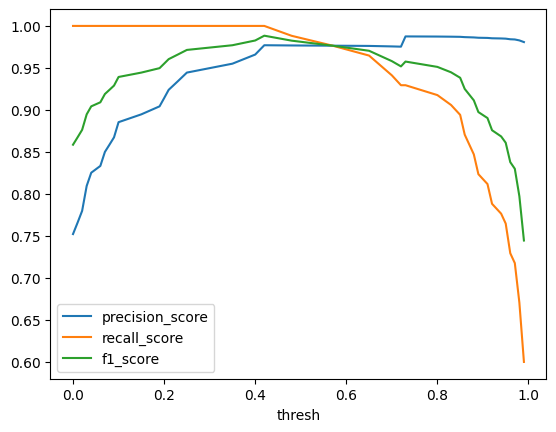

In [13]:
ax = metrics_by_thresh.plot(x="thresh")

In [2]:
#| echo: false
#| output: asis
show_doc(_BinInspector.confusion_matrix)

---

[source](https://github.com/gsganden/model_inspector/tree/main/blob/main/model_inspector/inspect/classifier.py#LNone){target="_blank" style="float:right; font-size:smaller"}

### _BinInspector.confusion_matrix

>      _BinInspector.confusion_matrix (thresh:float=0.5, labels=None,
>                                      sample_weight=None, normalize=None)

Get confusion matrix

Assumes that `self.model` has a `.predict_proba()` method. Uses
`self.y` as ground-truth values,
`self.model.predict_proba(self.X)[:, 1] > thresh` as
predictions.

If output is not rendering properly when you reopen a notebook,
make sure the notebook is trusted.

Parameters:

- `thresh`: Probability threshold for counting a prediction as
positive

Remaining parameters are passed to `sklearn.metrics._classification.confusion_matrix`.

In [15]:
inspector.confusion_matrix(thresh=metrics_by_thresh.loc[metrics_by_thresh.f1_score.idxmax(), "thresh"])

,Predicted 0,Predicted 1,Totals
Actual 0,56,2,58
Actual 1,0,85,85
Totals,56,87,143


## Multiclass Classification

In [3]:
#| echo: false
#| output: asis
show_doc(_MultiInspector.calculate_metrics_by_thresh)

---

[source](https://github.com/gsganden/model_inspector/tree/main/blob/main/model_inspector/inspect/classifier.py#L102){target="_blank" style="float:right; font-size:smaller"}

### _MultiInspector.calculate_metrics_by_thresh

>      _MultiInspector.calculate_metrics_by_thresh
>                                                   (metrics:Union[Callable,Sequ
>                                                   ence[Callable]], thresholds:
>                                                   Optional[Sequence]=None)

Calculate classification metrics as a function of threshold

Assumes that `self.model` has a `.predict_proba()` method. Uses
`self.y` as ground-truth values, uses the value with the highest
probability as the prediction if that probability exceeds the
threshold, `np.nan` otherwise.

Parameters:

- `metrics`: Callables that take `y_true`, `y_pred` as
positional arguments and return a number. Must have a `__name__`
attribute and must be able to handle `np.nan` values.
- `thresholds`: `Sequence` of `float` threshold values to use. By
default uses 0 and all values that appear in `y_prob`, which is a
minimal set that covers all of the relevant possibilities. One
reason to override that default would be to save time with a large
dataset.

Returns: DataFrame with one column "thresh" indicating the
thresholds used and an additional column for each input metric
giving the value of that metric at that threshold.

In [18]:
from functools import partial

from model_inspector.tune import calculate_metric_ignoring_nan, coverage

In [19]:
precision_ignoring_nan = partial(
    calculate_metric_ignoring_nan,
    metric=partial(metrics.precision_score, average="micro"),
)
precision_ignoring_nan.__name__ = "precision_ignoring_nan"

X, y = sklearn.datasets.load_iris(return_X_y=True, as_frame=True)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=2
)
inspector = get_inspector(
    RandomForestClassifier().fit(X_train.iloc[:, [3]], y_train),
    X_test.iloc[:, [3]],
    y_test,
)

In [22]:
metrics_by_thresh = inspector.calculate_metrics_by_thresh(
    metrics=[coverage, precision_ignoring_nan],
).iloc[:-1]  # dropping last row where precision is undefined
metrics_by_thresh

  0%|                                                                                                  | 0/13 [00:00<?, ?it/s]/Users/greg.gandenberger/.pyenv/versions/3.11.2/envs/model_inspector311/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
100%|███████████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 1406.98it/s]


,thresh,coverage,precision_ignoring_nan
0,0.000000,1.000000,0.947368
1,0.000000,1.000000,0.947368
2,0.017292,1.000000,0.947368
3,0.043056,1.000000,0.947368
4,0.131727,1.000000,0.947368
5,0.164198,1.000000,0.947368
6,0.206812,1.000000,0.947368
7,0.793188,0.947368,0.944444
8,0.835802,0.921053,0.942857
9,0.868273,0.815789,0.935484


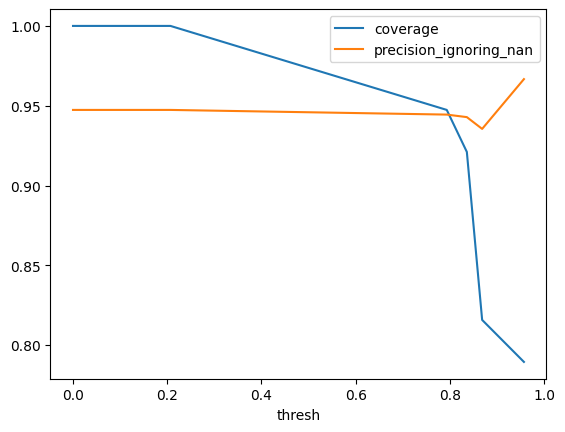

In [23]:
ax = metrics_by_thresh.iloc[:-1].plot(x="thresh")

In [4]:
#| echo: false
#| output: asis
show_doc(_MultiInspector.confusion_matrix)

---

[source](https://github.com/gsganden/model_inspector/tree/main/blob/main/model_inspector/inspect/classifier.py#LNone){target="_blank" style="float:right; font-size:smaller"}

### _MultiInspector.confusion_matrix

>      _MultiInspector.confusion_matrix (cmap='PuBu', low:float=0, high:float=0,
>                                        axis:Axis|None=0,
>                                        subset:Subset|None=None,
>                                        text_color_threshold:float=0.408,
>                                        vmin:float|None=None,
>                                        vmax:float|None=None,
>                                        gmap:Sequence|None=None)

Get confusion matrix

Uses `self.y` as ground-truth values,
`self.model.predict(self.X)` as predictions.

If output is not rendering properly when you reopen a notebook,
make sure the notebook is trusted.

Remaining parameters are passed to `pandas.io.formats.style.background_gradient`.

In [25]:
inspector.confusion_matrix()

,Predicted 0,Predicted 1,Predicted 2,Totals
Actual 0,16,0,0,16
Actual 1,0,10,1,11
Actual 2,0,1,10,11
Totals,16,11,11,38
